In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [14]:
data = pd.read_excel(r'C:/Users/Vicentito/Desktop/Data Analytics/22_03_20_a_17_03_21.xlsx')

data.head

<bound method NDFrame.head of                    FECHA EMYRT-T_B_SECO EMYRT-T_B_H_NATURAL EMYRT-T_GLOBO  \
0    2020-03-22 02:21:00        22.4021             17.5312       22.6838   
1    2020-03-22 09:37:48        26.5535             19.7303       27.3533   
2    2020-03-22 16:54:36        29.7421             21.4343       30.4846   
3    2020-03-23 00:11:24        25.1621             18.7889       25.4406   
4    2020-03-23 07:28:12        25.4768             18.4524       26.0416   
...                  ...            ...                 ...           ...   
1180 2021-03-15 18:52:48        31.4404              23.239       31.9683   
1181 2021-03-16 02:09:36        26.3898             21.3068       26.7635   
1182 2021-03-16 09:26:24        24.6393              21.344       25.0357   
1183 2021-03-16 16:43:12        25.4009             22.7029       25.6757   
1184 2021-03-17 00:00:00        25.1088             21.9203       25.1273   

     EMYRT-T_AMBIENTE EMYRT-T_TECHO EMYRT-HUM

In [3]:
ndindex = data[data['EMYRT-T_B_H_NATURAL'] == 'N/D'].index
secoclean = data.drop(ndindex, inplace= False)

ndindex2 = secoclean[secoclean['EMYRT-HUMEDAD_RELATIVA'] == 'N/D'].index
fdata = secoclean.drop(ndindex2, inplace = False)

In [4]:
fdata['FECHA'] = fdata['FECHA'].astype('datetime64')
fdata['EMYRT-T_B_SECO'] = fdata['EMYRT-T_B_SECO'].astype('float64') #Convirtio bulbo seco a flotante
fdata['EMYRT-T_B_H_NATURAL'] = fdata['EMYRT-T_B_H_NATURAL'].astype('float64')
fdata['EMYRT-T_GLOBO'] = fdata['EMYRT-T_GLOBO'].astype('float64')
fdata['EMYRT-T_AMBIENTE'] = fdata['EMYRT-T_AMBIENTE'].astype('float64')
fdata['EMYRT-T_TECHO'] = fdata['EMYRT-T_TECHO'].astype('float64')
fdata['EMYRT-HUMEDAD_RELATIVA'] = fdata['EMYRT-HUMEDAD_RELATIVA'].astype('float64')

fdata.dtypes


FECHA                     datetime64[ns]
EMYRT-T_B_SECO                   float64
EMYRT-T_B_H_NATURAL              float64
EMYRT-T_GLOBO                    float64
EMYRT-T_AMBIENTE                 float64
EMYRT-T_TECHO                    float64
EMYRT-HUMEDAD_RELATIVA           float64
dtype: object

In [5]:
fdata.rename(columns = {'EMYRT-T_B_SECO':'TBS', 'EMYRT-T_B_H_NATURAL':'TBH', 'EMYRT-T_GLOBO':'TG',
                        'EMYRT-T_AMBIENTE':'TA', 'EMYRT-T_TECHO':'T_TECHO', 'EMYRT-HUMEDAD_RELATIVA':'HR'},
             inplace=True)
fdata.set_index('FECHA',inplace = True)
fdata.columns

Index(['TBS', 'TBH', 'TG', 'TA', 'T_TECHO', 'HR'], dtype='object')

In [6]:
fdata['TGBH'] = 0.7*fdata['TBH']+0.3*fdata['TG']

<ipython-input-7-9167ae34c25d>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  panel.set_xticklabels(fdatand.columns)


Text(0.5, 1.0, 'Boxplot de los datos')

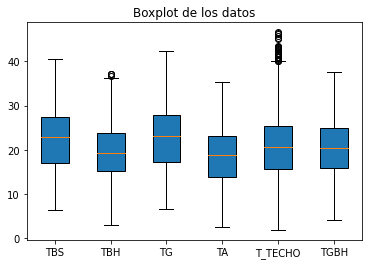

In [7]:
#sacar columna date
fdatand = fdata.drop(columns = ['HR'])

fig, panel = plt.subplots()

panel.set_xticklabels(fdatand.columns)
panel.boxplot(fdatand, patch_artist = True)

plt.title('Boxplot de los datos')

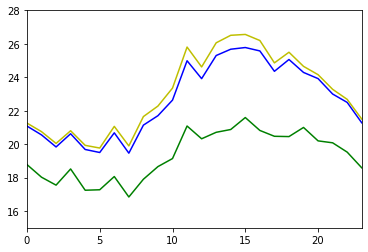

In [13]:
fdata_group_hours = fdata.groupby(fdata.index.hour).mean()

#Linea de las temperaturas

fig, pan_1 = plt.subplots(1, 1)

x = fdata_group_hours.index

pan_1.set_ylim(15, 28)
pan_1.set_xlim(0, 23)

pan_1.plot(x, fdata_group_hours['TBS'], color = 'b', label='TBS')
pan_1.plot(x, fdata_group_hours['TBH'], color = 'g', label='TBH')
pan_1.plot(x, fdata_group_hours['TG'], color = 'y', label='TG')


<ipython-input-9-ce9457432cee>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  panel.set_xticklabels(m30_rango.columns)


Text(0.5, 1.0, 'Boxplot de TGBH > 29 °C')

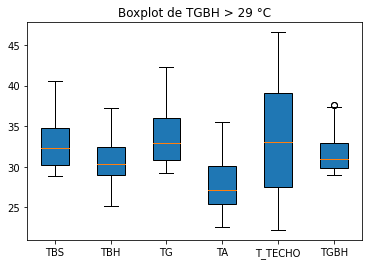

In [9]:
m30_rango = fdata.loc[fdata['TGBH'] >= 29]

m30_rango = m30_rango.drop(columns = ['HR'])

fig, panel = plt.subplots()

panel.set_xticklabels(m30_rango.columns)
panel.boxplot(m30_rango, patch_artist = True)

plt.title('Boxplot de TGBH > 29 °C')

<BarContainer object of 7 artists>

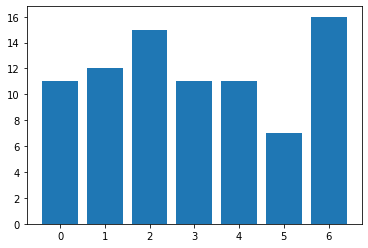

In [10]:
plt.bar([0,1,2,3,4,5,6], m30_rango['TGBH'].groupby(m30_rango.index.weekday).count())

In [11]:
#Valor optimo vs Valor Real
plt.scatter()

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

In [ ]:
plt.scatter(fdata.index.hour, fdata['TGBH'])
plt.plot(fdata.index.hour, np.full((1029, 1), 30), color ='r')

In [15]:
fdata.loc[fdata['TGBH'] >= 29]

,TBS,TBH,TG,TA,T_TECHO,HR,TGBH
FECHA,,,,,,,
2020-03-24 19:52:12,31.283498,29.285349,31.721121,29.010373,32.209386,88.174213,30.016081
2020-03-25 10:25:48,30.142319,29.987855,30.629808,25.889837,32.327121,98.597550,30.180441
2020-03-25 17:42:36,30.972111,30.818916,31.387883,26.719514,31.520389,98.694215,30.989606
2020-03-26 08:16:12,29.068895,28.980893,29.566789,24.676091,31.579312,98.716360,29.156662
2020-03-26 22:49:48,29.064963,28.907227,29.345770,25.468032,26.124574,98.566275,29.038790
...,...,...,...,...,...,...,...
2021-03-03 15:40:48,35.211882,26.802552,36.320640,31.212103,40.191480,51.880774,29.657978
2021-03-10 22:24:00,30.137160,29.747254,30.103539,24.750272,24.393528,97.099403,29.854140
2021-03-11 12:57:36,33.862422,33.957309,35.278385,29.985434,43.144813,98.914466,34.353632
